In [51]:
import pandas as pd
from datetime import timedelta, datetime

df = pd.read_csv('/Users/ludvigflodin/Documents/Courses/D7018B/Assignment 4/data (3).csv')

df.columns = [
    "UID", "Time", "Temperature", "Moisture", "Humidity",
    "Light", "Raw_Moisture", "Raw_Light"
]
# Convert time
origin = datetime(2000, 1, 1)
df["Timestamp"] = df["Time"].apply(lambda x: origin + timedelta(seconds=x))

df.head()

,UID,Time,Temperature,Moisture,Humidity,Light,Raw_Moisture,Raw_Light,Timestamp
0,329901,798061754,23.32432,100.00000,43.92676,2.686203,1383.0,110.0,2025-04-15 19:49:14
1,329901,798061814,23.29214,100.00000,43.90387,0.000000,1351.0,0.0,2025-04-15 19:50:14
2,329901,798061874,23.29214,100.00000,43.90387,0.000000,1374.0,0.0,2025-04-15 19:51:14
3,329901,798061934,23.29214,99.81818,43.89624,0.000000,1403.0,0.0,2025-04-15 19:52:14
4,329901,798061994,23.24924,100.00000,43.88098,0.000000,1383.0,0.0,2025-04-15 19:53:14


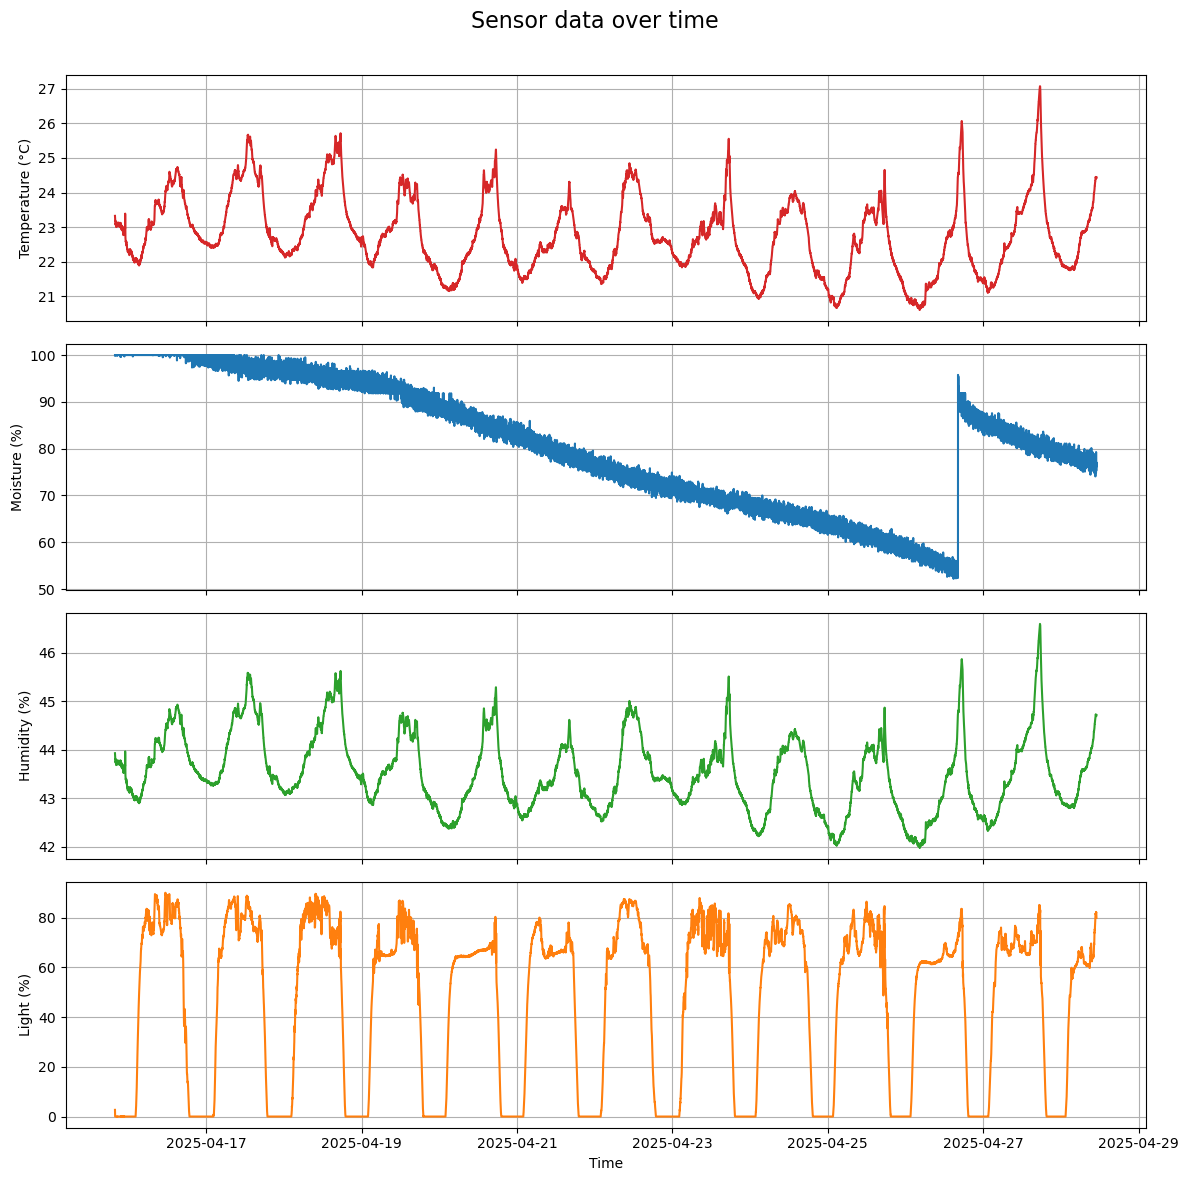

In [ ]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Temperature
axs[0].plot(df["Timestamp"], df["Temperature"], label="Temperature (°C)", color="tab:red")
axs[0].set_ylabel("Temperature (°C)")
# axs[0].legend(loc="upper right")
axs[0].grid(True)

# Moisture
axs[1].plot(df["Timestamp"], df["Moisture"], label="Moisture (%)", color="tab:blue")
axs[1].set_ylabel("Moisture (%)")
# axs[1].legend(loc="upper right")
axs[1].grid(True)

#Humidity
axs[2].plot(df["Timestamp"], df["Humidity"], label="Humidity (%)", color="tab:green")
axs[2].set_ylabel("Humidity (%)")
# axs[2].legend(loc="upper right")
axs[2].grid(True)

# Light
axs[3].plot(df["Timestamp"], df["Light"], label="Lumninace (%)", color="tab:orange")
axs[3].set_ylabel("Light (%)")
axs[3].set_xlabel("Time")
# axs[3].legend(loc="upper right")
axs[3].grid(True)

fig.suptitle("Sensor data over time", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


(array([20195., 20197., 20199., 20201., 20203., 20205., 20207.]),
 [Text(20195.0, 0, '2025-04-17'),
  Text(20197.0, 0, '2025-04-19'),
  Text(20199.0, 0, '2025-04-21'),
  Text(20201.0, 0, '2025-04-23'),
  Text(20203.0, 0, '2025-04-25'),
  Text(20205.0, 0, '2025-04-27'),
  Text(20207.0, 0, '2025-04-29')])

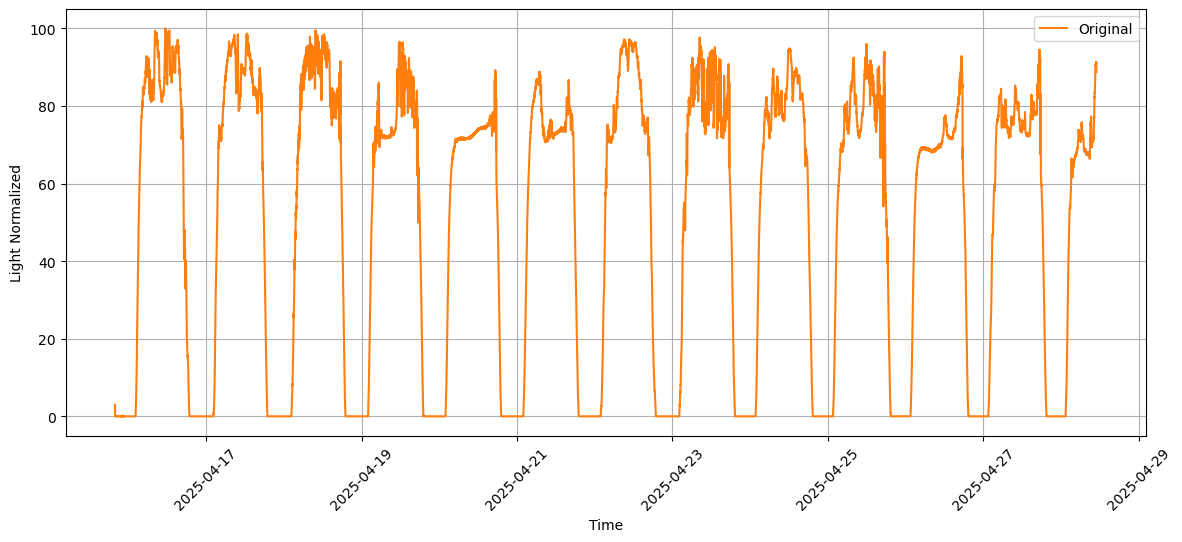

In [ ]:
# Normalize light
min_val = df['Raw_Light'].min()
max_val = df['Raw_Light'].max()
df['Light_Normalized'] = 100 * ((df['Raw_Light']-min_val) / (max_val - min_val))

plt.figure(figsize=(12, 5))
plt.plot(df["Timestamp"], df["Light_Normalized"], label="Original", alpha=0.4)
plt.xlabel("Time")
plt.ylabel("Light Normalized")
plt.title("")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)


,UID,Time,Temperature,Moisture,Humidity,Light,Raw_Moisture,Raw_Light,Timestamp,Moisture_Normalized,Moisture_Smoothed
0,329901,798061754,23.32432,100.00000,43.92676,2.686203,1383.0,110.0,2025-04-15 19:49:14,90.156600,NaN
1,329901,798061814,23.29214,100.00000,43.90387,0.000000,1351.0,0.0,2025-04-15 19:50:14,93.736018,NaN
2,329901,798061874,23.29214,100.00000,43.90387,0.000000,1374.0,0.0,2025-04-15 19:51:14,91.163311,NaN
3,329901,798061934,23.29214,99.81818,43.89624,0.000000,1403.0,0.0,2025-04-15 19:52:14,87.919463,NaN
4,329901,798061994,23.24924,100.00000,43.88098,0.000000,1383.0,0.0,2025-04-15 19:53:14,90.156600,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18178,329901,799152854,24.42900,75.27273,44.69733,81.855920,1808.0,3352.0,2025-04-28 10:54:14,42.617450,NaN
18179,329901,799152914,24.43973,77.09091,44.69733,81.709400,1778.0,3346.0,2025-04-28 10:55:14,45.973154,NaN
18180,329901,799152974,24.43973,76.36364,44.69733,81.098900,1790.0,3321.0,2025-04-28 10:56:14,44.630872,NaN
18181,329901,799153034,24.43973,76.90909,44.69733,80.732600,1781.0,3306.0,2025-04-28 10:57:14,45.637584,NaN


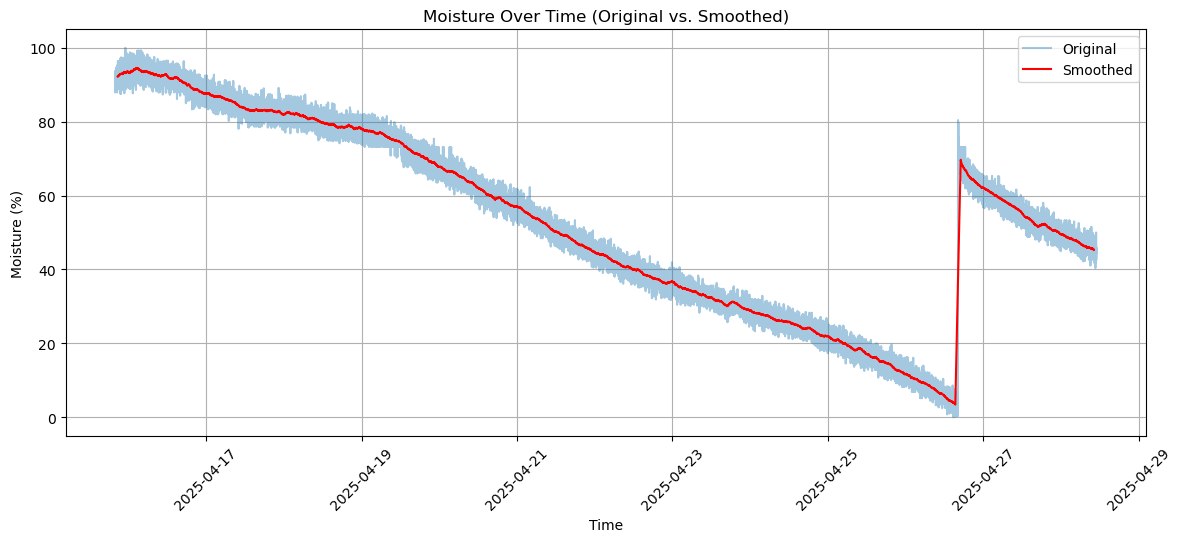

In [52]:


min_val = df['Raw_Moisture'].min()
max_val = df['Raw_Moisture'].max()
df['Moisture_Normalized'] = 100 * ((max_val - df['Raw_Moisture']) / (max_val - min_val))

# makes 25 and -25 indents NaN
df["Moisture_Smoothed"] = df["Moisture_Normalized"].rolling(window=100, center=True).mean()
plt.figure(figsize=(12, 5))
plt.plot(df["Timestamp"], df["Moisture_Normalized"], label="Original", alpha=0.4)
plt.plot(df["Timestamp"], df["Moisture_Smoothed"], label="Smoothed", color="red")
plt.xlabel("Time")
plt.ylabel("Moisture (%)")
plt.title("Moisture Over Time (Original vs. Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

df.to_json("dataset_processed.json", orient="records", date_format="iso")

df


-0.005592841199998588 0.029025252600796504


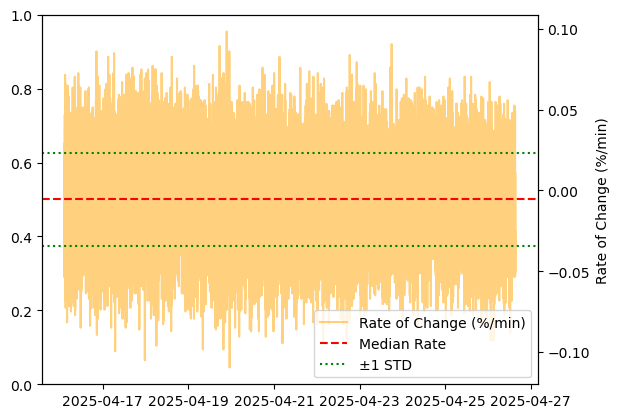

In [53]:
df = pd.read_json("dataset_processed.json")

idx_max = df["Moisture_Smoothed"].idxmax()
idx_min = df["Moisture_Smoothed"].idxmin()
df_drying = df.iloc[idx_max:idx_min].copy()

df_drying["TimeDelta"] = df_drying["Timestamp"].diff().dt.total_seconds() / 60  # in minutes
df_drying["Moisture_Change"] = df_drying["Moisture_Smoothed"].diff()
df_drying["Rate_Per_Minute"] = df_drying["Moisture_Change"] / df_drying["TimeDelta"]
median_rate = df_drying["Rate_Per_Minute"].median()
std_rate = df_drying["Rate_Per_Minute"].std()


print(median_rate,std_rate)

plt.twinx()
plt.plot(df_drying["Timestamp"], df_drying["Rate_Per_Minute"], color='orange', alpha=0.5, label="Rate of Change (%/min)")
plt.ylabel("Rate of Change (%/min)")
plt.axhline(median_rate, color='red', linestyle='--', label="Median Rate")
plt.axhline(median_rate + std_rate, color='green', linestyle=':', label="±1 STD")
plt.axhline(median_rate - std_rate, color='green', linestyle=':')
plt.legend(loc='lower right')
plt.show()

In [58]:
print(idx_max, idx_min)

print(df['Timestamp'].iloc[0])
print(df['Timestamp'].iloc[15567])

print( 24*(26-15)+(15-20) )

print((median_rate)*60, 100/(median_rate*60))

print( 60*0.029025252600796504*(298**0.5) )


400 15567
2025-04-15 20:39:14
2025-04-26 16:12:14
259
-0.3355704719999153 -297.99999804519524
30.063212761542292


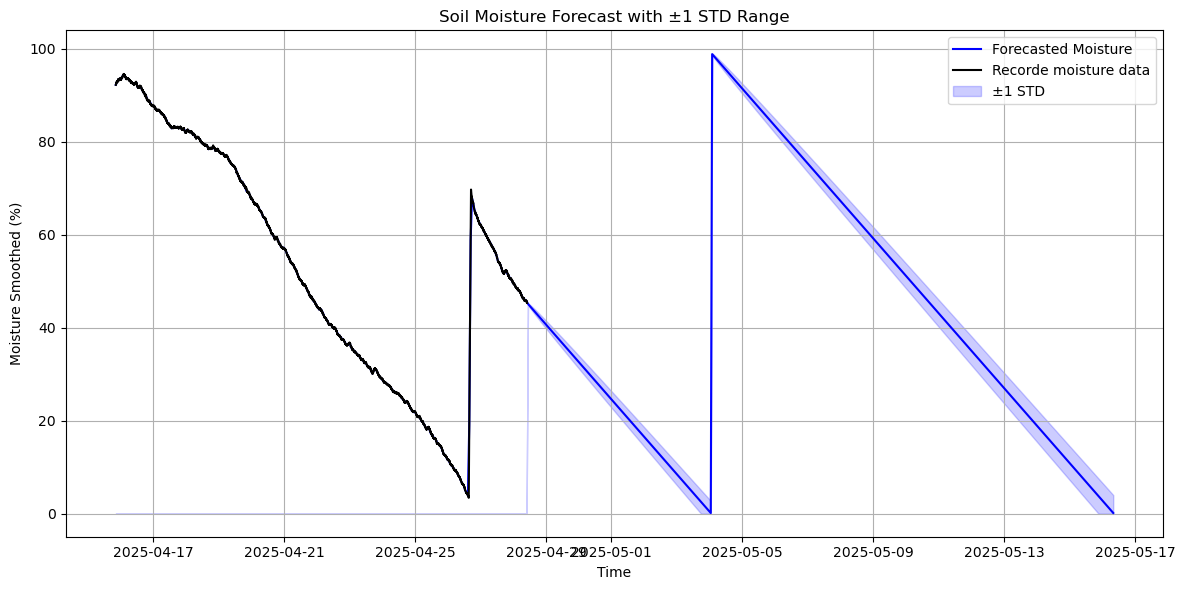

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset again
df = pd.read_json("dataset_processed.json")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df = df.dropna()

# Identify drying period
idx_max = df["Moisture_Smoothed"].idxmax()
idx_min = df["Moisture_Smoothed"].idxmin()
df_drying = df.loc[idx_max:idx_min].copy()
df_drying["TimeDelta"] = df_drying["Timestamp"].diff().dt.total_seconds() / 60
df_drying["Moisture_Change"] = df_drying["Moisture_Smoothed"].diff()
df_drying["Rate_Per_Minute"] = df_drying["Moisture_Change"] / df_drying["TimeDelta"]
df_drying.dropna(inplace=True)

# Median rate of drying
median_rate = df_drying["Rate_Per_Minute"].median()
std_rate = df_drying["Rate_Per_Minute"].std()
# std_rate = 0.001
# Create new forecast DataFrame
df_forecast = df[["Timestamp", "Moisture_Smoothed"]].copy()

last_moisture = df_forecast['Moisture_Smoothed'].iloc[-1]
last_time = df_forecast['Timestamp'].iloc[-1]
current_moisture = last_moisture
current_time = last_time
std_upper = 0
std_lower = 0

# Forecast by appending rows
while current_moisture > 0:
    current_time += pd.Timedelta(minutes=1)
    current_moisture += median_rate
    if current_moisture < 0:
        current_moisture = 0

    minutes_elapsed = (current_time - last_time).total_seconds() / 60
    std_total = std_rate * (minutes_elapsed ** 0.5)
    lower = max(current_moisture - std_total, 0)
    upper = current_moisture + std_total

    new_row = pd.DataFrame([{
        "Timestamp": current_time,
        "Moisture_Smoothed": current_moisture,
        "Lower_Bound": lower,
        "Upper_Bound": upper
    }])

    df_forecast = pd.concat([df_forecast, new_row], ignore_index=True)

last_moisture = 99
last_time = df_forecast['Timestamp'].iloc[-1]
current_moisture = last_moisture
current_time = last_time
std_upper = 0
std_lower = 0

# Forecast by appending rows
while current_moisture > 0:
    current_time += pd.Timedelta(minutes=1)
    current_moisture += median_rate
    if current_moisture < 0:
        current_moisture = 0

    minutes_elapsed = (current_time - last_time).total_seconds() / 60
    std_total = std_rate * (minutes_elapsed ** 0.5)
    lower = max(current_moisture - std_total, 0)
    upper = current_moisture + std_total

    new_row = pd.DataFrame([{
        "Timestamp": current_time,
        "Moisture_Smoothed": current_moisture,
        "Lower_Bound": lower,
        "Upper_Bound": upper
    }])

    df_forecast = pd.concat([df_forecast, new_row], ignore_index=True)

df_forecast.fillna(0, inplace=True)

df_forecast = df_forecast.iloc[::60]


plt.figure(figsize=(12, 6))
plt.plot(df_forecast["Timestamp"], df_forecast["Moisture_Smoothed"], label="Forecasted Moisture", color="blue")
plt.plot(df["Timestamp"], df["Moisture_Smoothed"], label="Recorde moisture data", color="black")
plt.fill_between(df_forecast["Timestamp"].values,
                 df_forecast["Lower_Bound"].values,
                 df_forecast["Upper_Bound"].values,
                 color="blue", alpha=0.2, label="±1 STD")

# plt.axvline(x=last_time, color="black", linestyle="-", label="Forecast Start")
plt.title("Soil Moisture Forecast with ±1 STD Range")
plt.xlabel("Time")
plt.ylabel("Moisture Smoothed (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


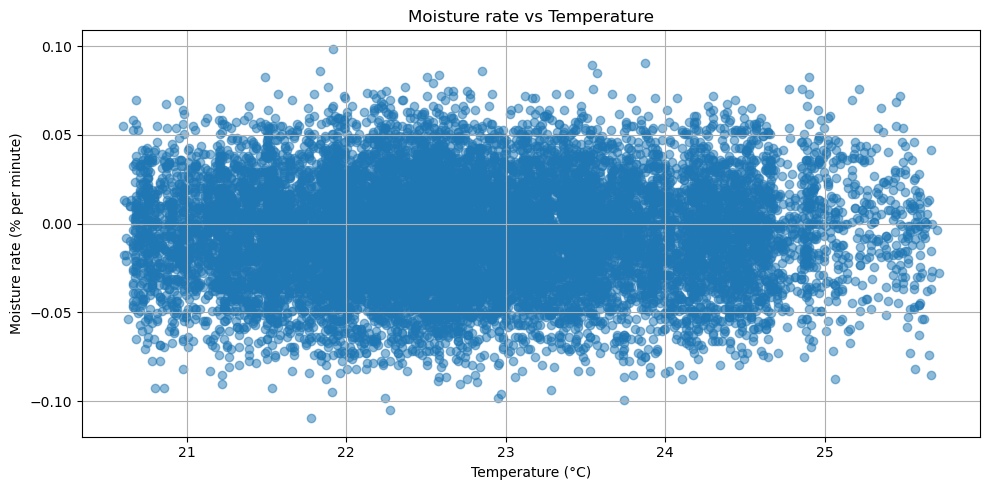

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_drying["Temperature"], df_drying["Rate_Per_Minute"], alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("Drying (% per minute)")
plt.title("Drying vs Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

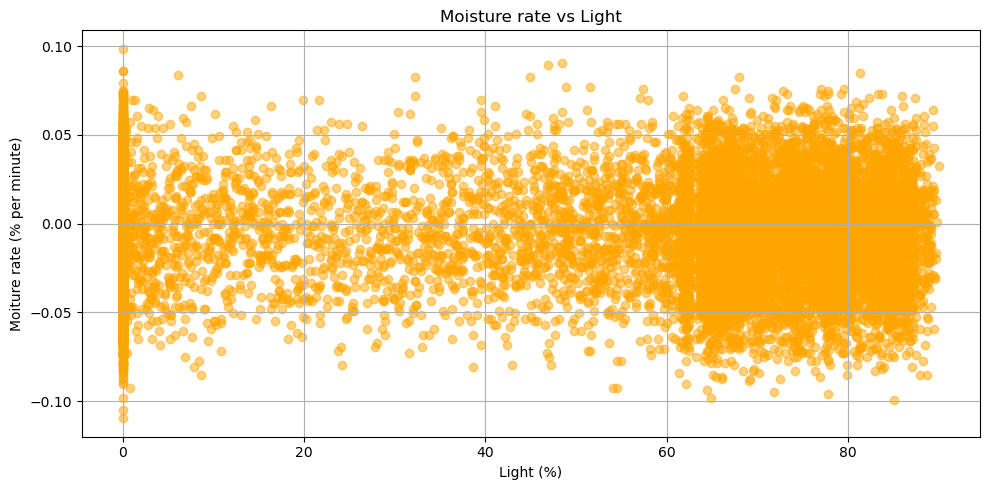

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_drying["Light"], df_drying["Rate_Per_Minute"], alpha=0.5, color="orange")
plt.xlabel("Light (%)")
plt.ylabel("Drying (% per minute)")
plt.title("Drying rate vs Light")
plt.grid(True)
plt.tight_layout()
plt.show()

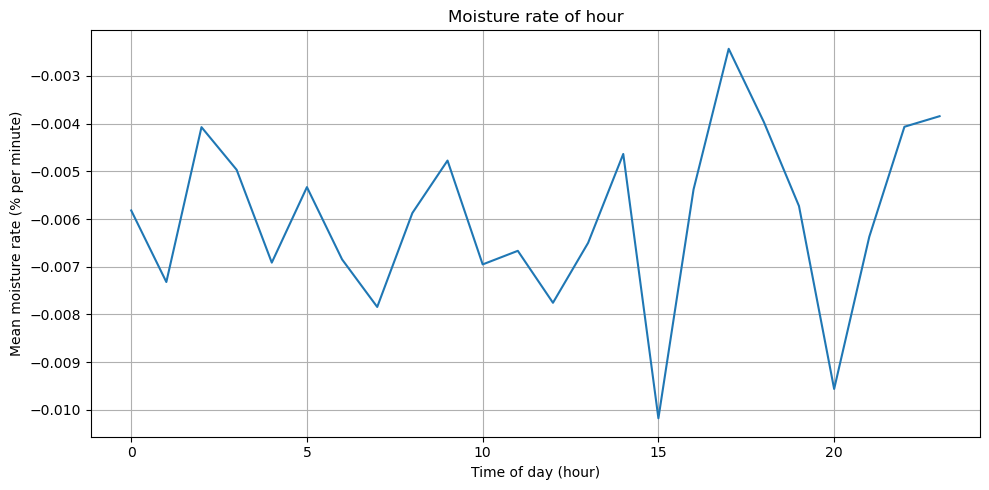

In [ ]:
df_drying["Hour"] = df_drying["Timestamp"].dt.hour
plt.figure(figsize=(10, 5))
plt.plot(df_drying.groupby("Hour")["Rate_Per_Minute"].mean())
plt.xlabel("Time of day (hour)")
plt.ylabel("Mean moisture rate (% per minute)")
plt.title("Drying rate of hour")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_json("dataset_processed.json")

# Find max and min index
idx_max = df["Moisture"].idxmax()
idx_min = df["Moisture"].idxmin()

# Determine slice order (in case min comes before max)
if idx_max < idx_min:
    df_drying = df.loc[idx_max:idx_min - 1].copy()
else:
    df_drying = df.loc[idx_min:idx_max - 1].copy()


df_drying["Moisture_Drop_Percent"] = df_drying["Moisture"].diff()

# time delta an drying per hour
df_drying["Delta_Time_Hours"] = df_drying["Timestamp"].diff().dt.total_seconds() / 3600
df_drying["Drop_Per_Hour"] = -df_drying["Moisture_Drop_Percent"] / df_drying["Delta_Time_Hours"]

df_drying = df_drying.iloc[1:].reset_index(drop=True)

# filter exteme values
valid_drops = df_drying[
    (df_drying["Drop_Per_Hour"] > 0) & (df_drying["Drop_Per_Hour"] < 10)]

mean_drop = valid_drops["Drop_Per_Hour"].mean()
std_drop = valid_drops["Drop_Per_Hour"].std()

df_drying.to_json("moisture_drying_segment.json", orient="records", date_format="iso")

df_drying


,UID,Time,Temperature,Moisture,Humidity,Light,Raw_Moisture,Raw_Light,Timestamp,Light_Normalized,Moisture_Normalized,Moisture_Smoothed,Moisture_Drop_Percent,Delta_Time_Hours,Drop_Per_Hour
0,329901,798064814,23.05619,100.00000,43.71313,0.02442,1374,1,2025-04-15 20:40:14,0.027122,91.163311,92.246085,0.00000,0.016667,-0.0000
1,329901,798064874,23.03474,100.00000,43.72839,0.00000,1373,0,2025-04-15 20:41:14,0.000000,91.275168,92.243848,0.00000,0.016667,-0.0000
2,329901,798064934,23.03474,100.00000,43.72839,0.00000,1353,0,2025-04-15 20:42:14,0.000000,93.512304,92.251678,0.00000,0.016667,-0.0000
3,329901,798064994,23.05619,100.00000,43.72839,0.00000,1359,0,2025-04-15 20:43:14,0.000000,92.841163,92.291946,0.00000,0.016667,-0.0000
4,329901,798065054,23.04546,100.00000,43.72839,0.00000,1327,0,2025-04-15 20:44:14,0.000000,96.420582,92.317673,0.00000,0.016667,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,329901,798993854,23.00256,54.42424,43.69025,65.61661,2152,2687,2025-04-26 14:44:14,72.877678,4.138702,3.969799,-2.06061,0.016667,123.6366
15479,329901,798993914,23.01329,54.12121,43.69788,65.76312,2157,2693,2025-04-26 14:45:14,73.040412,3.579418,3.964206,-0.30303,0.016667,18.1818
15480,329901,798993974,23.04546,52.72727,43.71313,65.71429,2180,2691,2025-04-26 14:46:14,72.986168,1.006711,3.942953,-1.39394,0.016667,83.6364
15481,329901,798994034,23.03474,54.54546,43.70551,65.86081,2150,2697,2025-04-26 14:47:14,73.148902,4.362416,3.912752,1.81819,0.016667,-109.0914
